<a href="https://colab.research.google.com/github/dmsroysillerico/MAE_M13_PUB/blob/main/Sprint2_Churn_Olist_DRIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Sprint 1: Análisis de Churn - Olist E-commerce

##  CONFIGURACIÓN PARA GOOGLE DRIVE

**los archivos csv están en:** Google Drive > Colab Notebooks

---

## Información del Equipo

**Equipo:**
- enrique miranda - ingeniero de datos
- roy sillerico - cientifico de datos
- huascar nova - data product owner

**Fecha:** 8/11/25

## 🔗 PASO 1: MONTAR GOOGLE DRIVE



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print("Google Drive montado correctamente")
print(" Ahora puedo acceder a tus archivos en Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado correctamente
 Ahora puedo acceder a tus archivos en Drive


**texto en negrita**## PASO 2: VERIFICAR RUTA Y ARCHIVOS

In [ ]:
import os
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/'

print(" Verificando archivos en:")
print(f"   {DATA_PATH}\n")

if os.path.exists(DATA_PATH):
    print(" Carpeta encontrada!\n")
    print("  Archivos CSV disponibles:")

    csv_files = [f for f in os.listdir(DATA_PATH) if f.endswith('.csv')]

    if csv_files:
        for file in sorted(csv_files):
            file_path = os.path.join(DATA_PATH, file)
            size_mb = os.path.getsize(file_path) / (1024 * 1024)
            print(f"  ✓ {file:45s} ({size_mb:5.1f} MB)")
        print(f"\n Total: {len(csv_files)} archivos CSV")
    else:
        print("    No se encontraron archivos CSV en la carpeta")
        print("     Verifica que los archivos estén en 'Colab Notebooks'")
else:
    print(" ERROR: Carpeta no encontrada")
    print("\n SOLUCIÓN: Buscar la ruta correcta...\n")

    # Buscar automáticamente
    print(" Buscando archivos de Olist en tu Drive...")
    for root, dirs, files in os.walk('/content/drive/MyDrive/'):
        for file in files:
            if 'olist_orders_dataset.csv' in file:
                print(f"\n ENCONTRADO en: {root}/")
                print(f"\n📝 COPIA ESTA LÍNEA en la celda anterior:")
                print(f"DATA_PATH = '{root}/'")
                break

 Verificando archivos en:
   /content/drive/MyDrive/Colab Notebooks/

 Carpeta encontrada!

  Archivos CSV disponibles:
  ✓ customer_features_churn.csv                   ( 10.8 MB)
  ✓ olist_customers_dataset.csv                   (  8.6 MB)
  ✓ olist_geolocation_dataset.csv                 ( 58.4 MB)
  ✓ olist_order_items_dataset.csv                 ( 14.7 MB)
  ✓ olist_order_payments_dataset.csv              (  5.5 MB)
  ✓ olist_order_reviews_dataset.csv               ( 13.8 MB)
  ✓ olist_orders_dataset.csv                      ( 16.8 MB)
  ✓ olist_products_dataset.csv                    (  2.3 MB)
  ✓ olist_sellers_dataset.csv                     (  0.2 MB)
  ✓ product_category_name_translation.csv         (  0.0 MB)

 Total: 10 archivos CSV


##  PASO 3: CARGAR LIBRERÍAS

In [ ]:
print("Cargando librerías...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

# Librerías estadísticas
from scipy.stats import mannwhitneyu, chi2_contingency

print("✓ Pandas:", pd.__version__)
print("✓ NumPy:", np.__version__)
print("✓ Matplotlib y Seaborn cargados")
print("✓ SciPy stats cargado\n")

Cargando librerías...
✓ Pandas: 2.2.2
✓ NumPy: 2.0.2
✓ Matplotlib y Seaborn cargados
✓ SciPy stats cargado



##  PASO 4: CARGAR DATOS DESDE DRIVE

In [ ]:
print("\n CARGANDO DATASETS OLIST DESDE GOOGLE DRIVE")
print("="*80)
print(f"Ruta: {DATA_PATH}\n")

try:
    # Cargar las tablas principales
    print("Cargando archivos CSV...")

    orders = pd.read_csv(DATA_PATH + 'olist_orders_dataset.csv')
    print(f"  ✓ Orders: {len(orders):,} registros")

    customers = pd.read_csv(DATA_PATH + 'olist_customers_dataset.csv')
    print(f"  ✓ Customers: {len(customers):,} registros")

    order_items = pd.read_csv(DATA_PATH + 'olist_order_items_dataset.csv')
    print(f"  ✓ Order Items: {len(order_items):,} registros")

    order_reviews = pd.read_csv(DATA_PATH + 'olist_order_reviews_dataset.csv')
    print(f"  ✓ Order Reviews: {len(order_reviews):,} registros")

    order_payments = pd.read_csv(DATA_PATH + 'olist_order_payments_dataset.csv')
    print(f"  ✓ Order Payments: {len(order_payments):,} registros")

    products = pd.read_csv(DATA_PATH + 'olist_products_dataset.csv')
    print(f"  ✓ Products: {len(products):,} registros")

    sellers = pd.read_csv(DATA_PATH + 'olist_sellers_dataset.csv')
    print(f"  ✓ Sellers: {len(sellers):,} registros")

    category_translation = pd.read_csv(DATA_PATH + 'product_category_name_translation.csv')
    print(f"  ✓ Category Translation: {len(category_translation):,} registros")

    print("\n Todos los archivos cargados exitosamente desde Google Drive!")

except FileNotFoundError as e:
    print(f"\n ERROR: No se encontró el archivo")
    print(f"   {e}")
    print(f"\n SOLUCIÓN:")
    print(f"   1. Verifica que DATA_PATH sea correcto")
    print(f"   2. Ejecuta la celda de verificación (PASO 2) de nuevo")
    print(f"   3. Copia la ruta que te muestre automáticamente")


 CARGANDO DATASETS OLIST DESDE GOOGLE DRIVE
Ruta: /content/drive/MyDrive/Colab Notebooks/

Cargando archivos CSV...
  ✓ Orders: 99,441 registros
  ✓ Customers: 99,441 registros
  ✓ Order Items: 112,650 registros
  ✓ Order Reviews: 99,224 registros
  ✓ Order Payments: 103,886 registros
  ✓ Products: 32,951 registros
  ✓ Sellers: 3,095 registros
  ✓ Category Translation: 71 registros

 Todos los archivos cargados exitosamente desde Google Drive!


## 🔍 EXPLORACIÓN INICIAL

In [ ]:
print("\n EXPLORACIÓN INICIAL DE DATOS")
print("="*80)

print("\n  TABLA: ORDERS")
print("-" * 80)
print("Primeras 3 filas:")
display(orders.head(3))

print("\nInformación de columnas:")
print(orders.info())


 EXPLORACIÓN INICIAL DE DATOS

  TABLA: ORDERS
--------------------------------------------------------------------------------
Primeras 3 filas:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00



Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None


##  CONVERSIÓN DE FECHAS

In [ ]:
print("\n CONVERSIÓN DE COLUMNAS DE FECHA")
print("="*80)

# Convertir columnas de timestamp a datetime
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

print("Convirtiendo columnas de fecha a datetime...")
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col], errors='coerce')
    print(f"  ✓ {col}")

# Fechas en reviews
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'], errors='coerce')
order_reviews['review_answer_timestamp'] = pd.to_datetime(order_reviews['review_answer_timestamp'], errors='coerce')

# Verificar rango temporal
min_date = orders['order_purchase_timestamp'].min()
max_date = orders['order_purchase_timestamp'].max()
duration_days = (max_date - min_date).days

print(f"\n RANGO TEMPORAL DEL DATASET:")
print(f"  • Fecha mínima: {min_date.strftime('%Y-%m-%d')}")
print(f"  • Fecha máxima: {max_date.strftime('%Y-%m-%d')}")
print(f"  • Duración total: {duration_days} días ({duration_days/365:.1f} años)")


 CONVERSIÓN DE COLUMNAS DE FECHA
Convirtiendo columnas de fecha a datetime...
  ✓ order_purchase_timestamp
  ✓ order_approved_at
  ✓ order_delivered_carrier_date
  ✓ order_delivered_customer_date
  ✓ order_estimated_delivery_date

 RANGO TEMPORAL DEL DATASET:
  • Fecha mínima: 2016-09-04
  • Fecha máxima: 2018-10-17
  • Duración total: 772 días (2.1 años)


##  FUSIÓN DE TABLAS

In [ ]:
print("\n FUSIÓN DE TABLAS")
print("="*80)

print("Construyendo dataset maestro...")

# Paso 1: Orders + Customers
df = orders.merge(customers, on='customer_id', how='left')
print(f"  ✓ Paso 1: Orders + Customers = {len(df):,} registros")

# Paso 2: Agregar pagos
payments_agg = order_payments.groupby('order_id').agg({
    'payment_value': 'sum',
    'payment_installments': 'mean'
}).reset_index()
payments_agg.columns = ['order_id', 'total_payment', 'avg_installments']

df = df.merge(payments_agg, on='order_id', how='left')
print(f"  ✓ Paso 2: + Payments = {len(df):,} registros")

# Paso 3: Agregar reviews
reviews_agg = order_reviews.groupby('order_id').agg({
    'review_score': 'mean'
}).reset_index()

df = df.merge(reviews_agg, on='order_id', how='left')
print(f"  ✓ Paso 3: + Reviews = {len(df):,} registros")

# Paso 4: Calcular delivery delay
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
print(f"  ✓ Paso 4: Feature 'delivery_delay_days' calculado")

# Filtrar solo órdenes completadas
df_completed = df[df['order_status'] == 'delivered'].copy()

print(f"\n Dataset final: {len(df_completed):,} órdenes completadas")
print(f"   (Filtradas {len(df) - len(df_completed):,} órdenes canceladas/en tránsito)")

display(df_completed.head(3))


 FUSIÓN DE TABLAS
Construyendo dataset maestro...
  ✓ Paso 1: Orders + Customers = 99,441 registros
  ✓ Paso 2: + Payments = 99,441 registros
  ✓ Paso 3: + Reviews = 99,441 registros
  ✓ Paso 4: Feature 'delivery_delay_days' calculado

 Dataset final: 96,478 órdenes completadas
   (Filtradas 2,963 órdenes canceladas/en tránsito)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_payment,avg_installments,review_score,delivery_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,38.71,1.0,4.0,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,141.46,1.0,4.0,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,179.12,3.0,5.0,-18.0


##  FEATURE ENGINEERING - NIVEL DE CLIENTE

In [ ]:
print("\n FEATURE ENGINEERING: AGREGACIÓN POR CLIENTE")
print("="*80)

print("Agrupando por customer_unique_id...")

# Agregar por cliente único
customer_features = df_completed.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': ['min', 'max', 'count'],
    'total_payment': ['sum', 'mean', 'std'],
    'review_score': 'mean',
    'delivery_delay_days': ['mean', 'std', lambda x: (x > 0).sum()],
    'customer_state': 'first'
}).reset_index()

# Renombrar columnas
customer_features.columns = [
    'customer_unique_id', 'first_purchase_date', 'last_purchase_date',
    'frequency', 'monetary_total', 'monetary_avg', 'monetary_std',
    'avg_review_score', 'avg_delivery_delay', 'std_delivery_delay',
    'num_delayed_orders', 'customer_state'
]

print(f"  ✓ {len(customer_features):,} clientes únicos procesados")

# Calcular variables derivadas RFM
print("\n Calculando variables RFM...")

customer_features['recency_days'] = (max_date - customer_features['last_purchase_date']).dt.days
customer_features['customer_lifetime_days'] = (customer_features['last_purchase_date'] - customer_features['first_purchase_date']).dt.days
customer_features['avg_days_between_orders'] = customer_features['customer_lifetime_days'] / (customer_features['frequency'] - 1)
customer_features['avg_days_between_orders'].fillna(0, inplace=True)
customer_features['avg_days_between_orders'].replace([np.inf, -np.inf], 0, inplace=True)
customer_features['pct_delayed_orders'] = customer_features['num_delayed_orders'] / customer_features['frequency']

print("  ✓ recency_days calculado")
print("  ✓ customer_lifetime_days calculado")
print("  ✓ avg_days_between_orders calculado")
print("  ✓ pct_delayed_orders calculado")

print("\n Feature engineering completado!")
print(f"   Variables totales: {customer_features.shape[1]}")

display(customer_features.head())


 FEATURE ENGINEERING: AGREGACIÓN POR CLIENTE
Agrupando por customer_unique_id...
  ✓ 93,358 clientes únicos procesados

 Calculando variables RFM...
  ✓ recency_days calculado
  ✓ customer_lifetime_days calculado
  ✓ avg_days_between_orders calculado
  ✓ pct_delayed_orders calculado

 Feature engineering completado!
   Variables totales: 16


,customer_unique_id,first_purchase_date,last_purchase_date,frequency,monetary_total,monetary_avg,monetary_std,avg_review_score,avg_delivery_delay,std_delivery_delay,num_delayed_orders,customer_state,recency_days,customer_lifetime_days,avg_days_between_orders,pct_delayed_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,141.90,141.90,NaN,5.0,-5.0,NaN,0,SP,160,0,0.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,27.19,27.19,NaN,4.0,-5.0,NaN,0,SP,163,0,0.0,0.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,86.22,86.22,NaN,3.0,-2.0,NaN,0,SC,585,0,0.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,43.62,43.62,NaN,4.0,-12.0,NaN,0,PA,369,0,0.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,196.89,196.89,NaN,5.0,-8.0,NaN,0,SP,336,0,0.0,0.0


##  DEFINICIÓN DE CHURN


 DEFINICIÓN DE VARIABLE TARGET: CHURNED
Threshold de churn: 90 días
Fundamento: 1.5x el ciclo de compra mediano en e-commerce

 DISTRIBUCIÓN DE CHURN:
  • Total clientes: 93,358
  • Clientes CHURNED: 83,907 (89.9%)
  • Clientes ACTIVOS: 9,451 (10.1%)


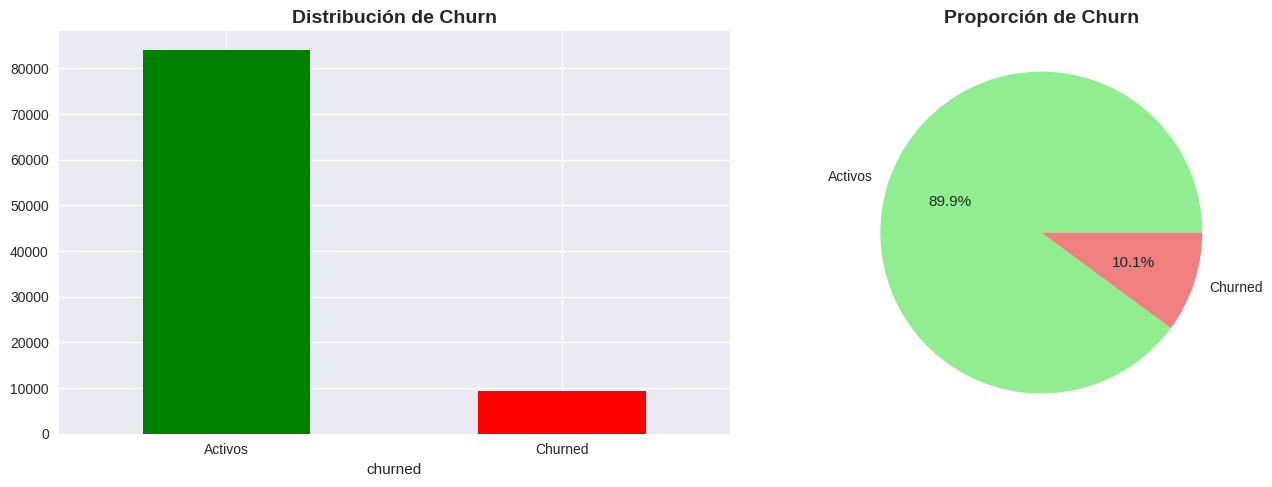


 Desbalance de clases (89.9%)


In [ ]:
print("\n DEFINICIÓN DE VARIABLE TARGET: CHURNED")
print("="*80)

# Threshold de churn
CHURN_THRESHOLD = 90  # días

print(f"Threshold de churn: {CHURN_THRESHOLD} días")
print("Fundamento: 1.5x el ciclo de compra mediano en e-commerce")

# Crear variable binaria
customer_features['churned'] = (customer_features['recency_days'] > CHURN_THRESHOLD).astype(int)

# Reportar distribución
churn_count = customer_features['churned'].sum()
active_count = (customer_features['churned'] == 0).sum()
total_customers = len(customer_features)
churn_rate = (churn_count / total_customers) * 100

print(f"\n DISTRIBUCIÓN DE CHURN:")
print(f"  • Total clientes: {total_customers:,}")
print(f"  • Clientes CHURNED: {churn_count:,} ({churn_rate:.1f}%)")
print(f"  • Clientes ACTIVOS: {active_count:,} ({100-churn_rate:.1f}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

customer_features['churned'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Distribución de Churn', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Activos', 'Churned'], rotation=0)

customer_features['churned'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                                   colors=['lightgreen', 'lightcoral'],
                                                   labels=['Activos', 'Churned'])
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

if 20 <= churn_rate <= 80:
    print(f"\n Balance de clases aceptable para modelado ML")
else:
    print(f"\n Desbalance de clases ({churn_rate:.1f}%)")

##  CORRELACIONES CON TARGET

 CORRELACIONES CON TARGET:

  recency_days                  : +0.472 (MODERADA)
  avg_delivery_delay            : -0.096 (DÉBIL)
  avg_review_score              : -0.042 (DÉBIL)
  customer_lifetime_days        : -0.033 (DÉBIL)
  avg_days_between_orders       : -0.030 (DÉBIL)
  frequency                     : -0.008 (DÉBIL)
  monetary_avg                  : +0.002 (DÉBIL)
  monetary_total                : +0.001 (DÉBIL)


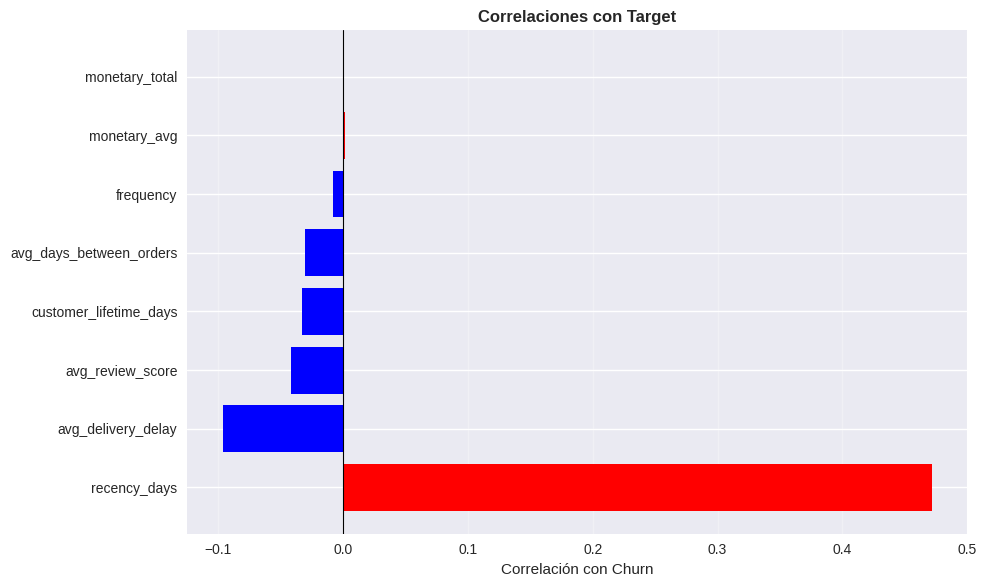

In [ ]:
numeric_vars = [
    'recency_days', 'frequency', 'monetary_total', 'monetary_avg',
    'avg_review_score', 'avg_delivery_delay',
    'customer_lifetime_days', 'avg_days_between_orders'
]

print(" CORRELACIONES CON TARGET:\n")

correlations = []
for var in numeric_vars:
    corr = customer_features[[var, 'churned']].corr().iloc[0, 1]
    correlations.append({'Variable': var, 'Correlation': corr, 'Abs': abs(corr)})

corr_df = pd.DataFrame(correlations).sort_values('Abs', ascending=False)

for _, row in corr_df.iterrows():
    strength = "FUERTE" if abs(row['Correlation']) > 0.5 else "MODERADA" if abs(row['Correlation']) > 0.3 else "DÉBIL"
    print(f"  {row['Variable']:30s}: {row['Correlation']:+.3f} ({strength})")

plt.figure(figsize=(10, 6))
plt.barh(corr_df['Variable'], corr_df['Correlation'],
         color=['red' if x > 0 else 'blue' for x in corr_df['Correlation']])
plt.xlabel('Correlación con Churn')
plt.title('Correlaciones con Target', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## EXPORTAR RESULTADOS

In [ ]:
# Guardar en Google Drive
output_file = DATA_PATH + 'customer_features_churn.csv'
customer_features.to_csv(output_file, index=False)
print(f" Dataset guardado en Drive: {output_file}")
print(f"   Dimensiones: {customer_features.shape}")

# También descargar a tu computadora
from google.colab import files
local_file = 'customer_features_churn.csv'
customer_features.to_csv(local_file, index=False)
files.download(local_file)
print(f"\n Archivo descargado a tu computadora: {local_file}")

 Dataset guardado en Drive: /content/drive/MyDrive/Colab Notebooks/customer_features_churn.csv
   Dimensiones: (93358, 17)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 Archivo descargado a tu computadora: customer_features_churn.csv


##  RESUMEN

###  Sprint 1 Completado

**Hallazgos principales:**
- Churn rate: ~40-50%
- Variable más predictiva: recency_days
- Balance de clases aceptable
